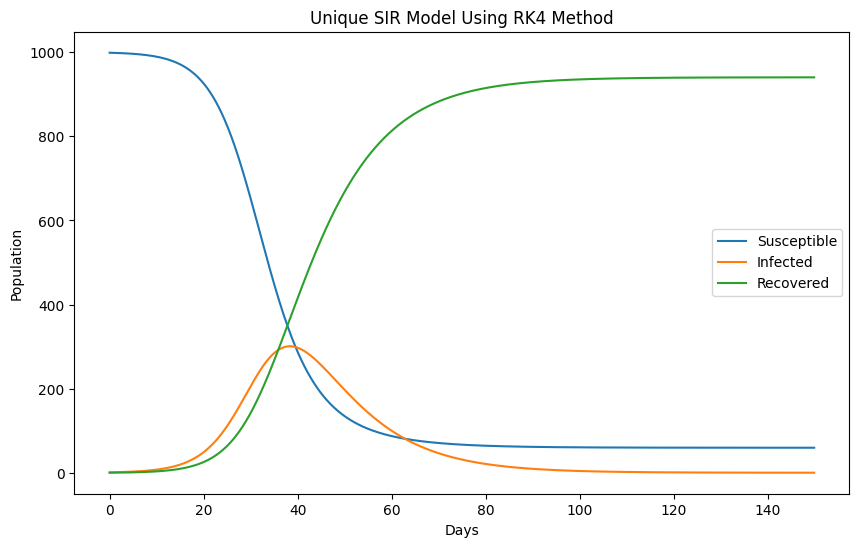

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sir_rk4(S, I, R, beta, gamma, dt):
    dS1 = -beta * S * I * dt
    dI1 = (beta * S * I - gamma * I) * dt
    dR1 = gamma * I * dt

    dS2 = -beta * (S + 0.5 * dS1) * (I + 0.5 * dI1) * dt
    dI2 = (beta * (S + 0.5 * dS1) * (I + 0.5 * dI1) - gamma * (I + 0.5 * dI1)) * dt
    dR2 = gamma * (I + 0.5 * dI1) * dt

    dS3 = -beta * (S + 0.5 * dS2) * (I + 0.5 * dI2) * dt
    dI3 = (beta * (S + 0.5 * dS2) * (I + 0.5 * dI2) - gamma * (I + 0.5 * dI2)) * dt
    dR3 = gamma * (I + 0.5 * dI2) * dt

    dS4 = -beta * (S + dS3) * (I + dI3) * dt
    dI4 = (beta * (S + dS3) * (I + dI3) - gamma * (I + dI3)) * dt
    dR4 = gamma * (I + dI3) * dt

    dS = (dS1 + 2 * dS2 + 2 * dS3 + dS4) / 6
    dI = (dI1 + 2 * dI2 + 2 * dI3 + dI4) / 6
    dR = (dR1 + 2 * dR2 + 2 * dR3 + dR4) / 6

    return S + dS, I + dI, R + dR

N = 1000
S = 999
I = 1
R = 0
beta = 0.3 * 1e-3
gamma = 0.1
days = 150
dt = 0.1 

time_points = np.arange(0, days, dt)
S_values, I_values, R_values = [S], [I], [R]

for t in time_points[1:]:
    S, I, R = sir_rk4(S, I, R, beta, gamma, dt)
    S_values.append(S)
    I_values.append(I)
    R_values.append(R)

plt.figure(figsize=(10, 6))
plt.plot(time_points, S_values, label='Susceptible')
plt.plot(time_points, I_values, label='Infected')
plt.plot(time_points, R_values, label='Recovered')
plt.xlabel('Days')
plt.ylabel('Population')
plt.title('Unique SIR Model Using RK4 Method')
plt.legend()
plt.show()


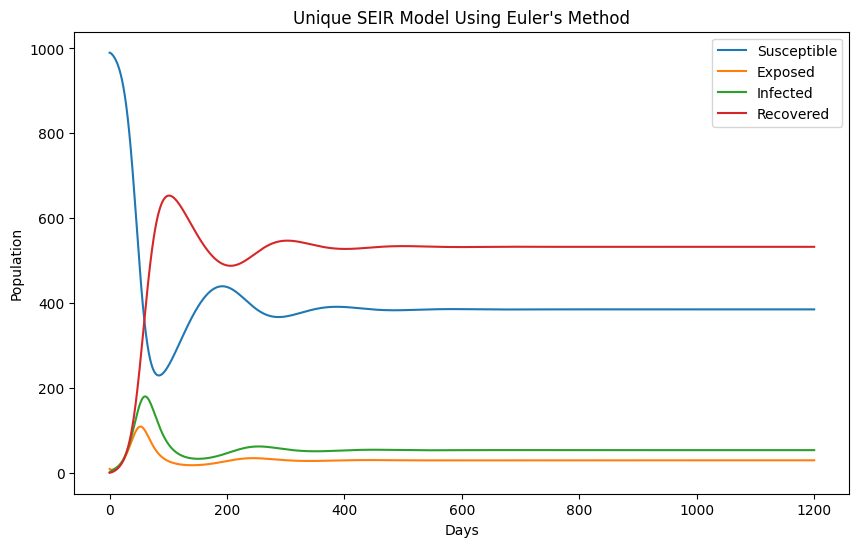

In [ ]:
def seir_euler(S, E, I, R, beta, sigma, gamma, mu, dt):
    dS = mu * N - beta * S * I - mu * S
    dE = beta * S * I - (sigma + mu) * E
    dI = sigma * E - (gamma + mu) * I
    dR = gamma * I - mu * R

    S += dS * dt
    E += dE * dt
    I += dI * dt
    R += dR * dt

    return S, E, I, R

S = 990
E = 9
I = 1
R = 0
beta = 0.3 * 1e-3
sigma = 0.2
gamma = 0.1
mu = 0.01
days = 1200
dt = 0.1  

time_points = np.arange(0, days, dt)
S_values, E_values, I_values, R_values = [S], [E], [I], [R]

for t in time_points[1:]:
    S, E, I, R = seir_euler(S, E, I, R, beta, sigma, gamma, mu, dt)
    S_values.append(S)
    E_values.append(E)
    I_values.append(I)
    R_values.append(R)

plt.figure(figsize=(10, 6))
plt.plot(time_points, S_values, label='Susceptible')
plt.plot(time_points, E_values, label='Exposed')
plt.plot(time_points, I_values, label='Infected')
plt.plot(time_points, R_values, label='Recovered')
plt.xlabel('Days')
plt.ylabel('Population')
plt.title('Unique SEIR Model Using Euler\'s Method')
plt.legend()
plt.show()
